# World Happiness Data Notebook

In [67]:
import pandas as pd

hap15 = pd.read_csv("../data/extra-challenge/happiness_data/2015.csv")
hap16 = pd.read_csv("../data/extra-challenge/happiness_data/2016.csv")
hap17 = pd.read_csv("../data/extra-challenge/happiness_data/2017.csv")
hap18 = pd.read_csv("../data/extra-challenge/happiness_data/2018.csv")
hap19 = pd.read_csv("../data/extra-challenge/happiness_data/2019.csv")

In [68]:
# Is there any missing data?
hap17.isnull().values.any()

# Output =>
True


# Let's figure out which columns are missing data
for column in hap17:
    print(f"Column Name: {column}")
    print(f"Is missing data: {hap17[column].isnull().any()} \n")

Column Name: Country
Is missing data: False 

Column Name: Happiness.Rank
Is missing data: False 

Column Name: Happiness.Score
Is missing data: True 

Column Name: Whisker.high
Is missing data: False 

Column Name: Whisker.low
Is missing data: False 

Column Name: Economy..GDP.per.Capita.
Is missing data: False 

Column Name: Family
Is missing data: False 

Column Name: Health..Life.Expectancy.
Is missing data: False 

Column Name: Freedom
Is missing data: False 

Column Name: Generosity
Is missing data: False 

Column Name: Trust..Government.Corruption.
Is missing data: False 

Column Name: Dystopia.Residual
Is missing data: False 



In [69]:
missing_countries = hap17[['Country', 'Happiness.Score']].loc[hap17['Happiness.Score'].isnull()]

print(missing_countries)

        Country  Happiness.Score
0        Norway              NaN
7   New Zealand              NaN
19        Chile              NaN
30       France              NaN


In [70]:
val_15 = hap15['Happiness Score'].loc[hap15['Country']=='Norway'].iloc[0]



In [71]:
average_dict = {}

for country in missing_countries['Country']:
    country_mean = [
        hap15['Happiness Score'].loc[hap15['Country']==country],
        hap16['Happiness Score'].loc[hap16['Country']==country],
        hap18['Score'].loc[hap18['Country or region']==country],
        hap19['Score'].loc[hap19['Country or region']==country]]
    average_dict[country] = country_mean[0].mean()

hap17['Happiness.Score'] = hap17['Happiness.Score'].fillna(hap17['Country'].map(average_dict))
hap17

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.522,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


Does the GDP data for the United Kingdom seem to have an influence on the overall standings in Happiness Rank?

- Happiness rank is ordinal data as it is ordered and mutually exclusive.
- GDP per capita is continuous numerical data as it is an average measurement which can take non-integer values. 

Text(0.5, 1.0, 'Happiness in the United Kingdom')

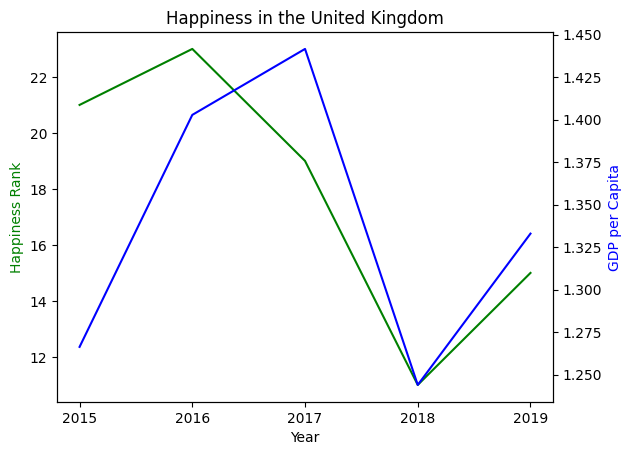

In [91]:
import matplotlib.pyplot as plt

uk_hap_rank = [
        hap15['Happiness Rank'].loc[hap15['Country']=='United Kingdom'].iloc[0],
        hap16['Happiness Rank'].loc[hap16['Country']=='United Kingdom'].iloc[0],
        hap17['Happiness.Rank'].loc[hap17['Country']=='United Kingdom'].iloc[0],
        hap18['Overall rank'].loc[hap18['Country or region']=='United Kingdom'].iloc[0],
        hap19['Overall rank'].loc[hap19['Country or region']=='United Kingdom'].iloc[0]]
uk_gdps = [
        hap15['Economy (GDP per Capita)'].loc[hap15['Country']=='United Kingdom'].iloc[0],
        hap16['Economy (GDP per Capita)'].loc[hap16['Country']=='United Kingdom'].iloc[0],
        hap17['Economy..GDP.per.Capita.'].loc[hap17['Country']=='United Kingdom'].iloc[0],
        hap18['GDP per capita'].loc[hap18['Country or region']=='United Kingdom'].iloc[0],
        hap19['GDP per capita'].loc[hap19['Country or region']=='United Kingdom'].iloc[0]]
years = ['2015', '2016', '2017', '2018', '2019']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(years, uk_hap_rank, 'g-', label='Happiness Rank')
ax2.plot(years, uk_gdps, 'b-', label='GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('Happiness Rank', color='g')
ax2.set_ylabel('GDP per Capita', color='b')
plt.title("Happiness in the United Kingdom")